In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import random

In [5]:
def kmeans(x, y, num_clusters):
    
    centroids_x = random.sample(list(x), num_clusters)
    centroids_y = random.sample(list(y), num_clusters)
    centroids = list(zip(centroids_x, centroids_y))

    while True:
        clusters = {}
        for i in range(num_clusters):
            cluster_name = f'Cluster {i+1}'
            clusters[cluster_name] = []
        for x_i, y_i in zip(x, y):
            closest_centroid = centroids[np.argmin([np.sqrt((x_i-c[0])**2 + (y_i-c[1])**2) for c in centroids])]
            closest_centroid_index = centroids.index(closest_centroid)
            clusters[f'Cluster {closest_centroid_index+1}'].append((x_i, y_i))
        
        new_centroids = []
        for cluster in clusters.values():
            if cluster:
                new_centroids.append((np.mean([c[0] for c in cluster]), np.mean([c[1] for c in cluster])))
            else:
                new_centroids.append(centroids[clusters.values().index(cluster)])
        
        if set(new_centroids) == set(centroids):
            break
        centroids = new_centroids

    return clusters

In [17]:
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [18]:
df = pd.DataFrame(data_scaled)
df

,0,1
0,-1.116190,0.583772
1,-1.192142,0.658633
2,0.325204,0.796111
3,-0.699477,-1.387959
4,-1.415179,0.558312
...,...,...
295,-0.048549,1.052981
296,1.366339,-0.230452
297,-0.135000,1.022241
298,-1.025707,0.990230


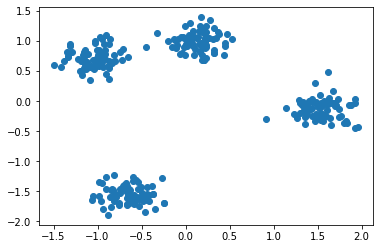

In [8]:
plt.scatter(df[0],df[1])

In [12]:
clusters = kmeans(df[0],df[1],4)

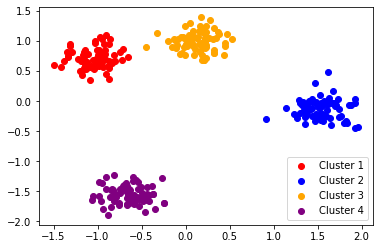

In [13]:
fig, ax = plt.subplots()

colors = ['red', 'blue', 'orange', 'purple']

for i, cluster in enumerate(clusters):
    x, y = zip(*clusters[cluster])
    ax.scatter(x, y, c=colors[i], label=cluster)

ax.legend()
plt.show()

In [14]:
def kmedoids(X, k, max_iterations=100):

    medoids = X[np.random.choice(X.shape[0], k, replace=False), :]

    for i in range(max_iterations):
        distances = np.abs(X[:, np.newaxis, :] - medoids[np.newaxis, :, :]).sum(axis=-1)
        clusters = np.argmin(distances, axis=1)

        for j in range(k):
            cluster_j = X[clusters == j, :]
            cost_j = np.sum(np.abs(cluster_j[:, np.newaxis, :] - cluster_j[np.newaxis, :, :]).sum(axis=-1), axis=1)
            medoid_j = cluster_j[np.argmin(cost_j), :]
            medoids[j, :] = medoid_j

    return medoids, clusters

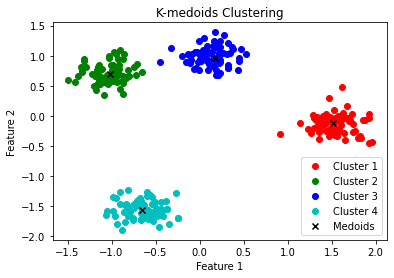

In [22]:
medoids, clusters = kmedoids(data_scaled, 4)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(4):
    cluster_i = data_scaled[clusters == i, :]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1], c=colors[i], label='Cluster {}'.format(i+1))

plt.scatter(medoids[:, 0], medoids[:, 1], c='k', marker='x', label='Medoids')
plt.legend()
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()